In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Business Analytics Project/dummies.csv')

In [ ]:
df.describe().transpose()

count         mean          std  \
fraud_bool                        1000000.0     0.011029     0.104438   
income                            1000000.0     0.562696     0.290343   
name_email_similarity             1000000.0     0.493694     0.289125   
prev_address_months_count         1000000.0    16.718568    44.046230   
current_address_months_count      1000000.0    86.587867    88.406599   
customer_age                      1000000.0    33.689080    12.025799   
days_since_request                1000000.0     1.025705     5.381835   
intended_balcon_amount            1000000.0     8.661499    20.236155   
zip_count_4w                      1000000.0  1572.692049  1005.374565   
velocity_6h                       1000000.0  5665.296605  3009.380665   
velocity_24h                      1000000.0  4769.781965  1479.212612   
velocity_4w                       1000000.0  4856.324016   919.843934   
bank_branch_count_8w              1000000.0   184.361849   459.625329   
date_of_birth_distinct_emails_4w  1000000.0     9.503544     5.033792   
credit_risk_score                 1000000.0   130.989595    69.681812   
email_is_free                     1000000.0     0.529886     0.499106   
phone_home_valid                  1000000.0     0.417077     0.493076   
phone_mobile_valid                1000000.0     0.889676     0.313293   
bank_months_count                 1000000.0    10.839303    12.116875   
has_other_cards                   1000000.0     0.222988     0.416251   
proposed_credit_limit             1000000.0   515.851010   487.559902   
foreign_request                   1000000.0     0.025242     0.156859   
session_length_in_minutes         1000000.0     7.544940     8.033106   
keep_alive_session                1000000.0     0.576947     0.494044   
device_distinct_emails_8w         1000000.0     1.018312     0.180761   
device_fraud_count                1000000.0     0.000000     0.000000   
month                             1000000.0     3.288674     2.209994   
payment_type_AA                   1000000.0     0.258249     0.437672   
payment_type_AB                   1000000.0     0.370554     0.482953   
payment_type_AC                   1000000.0     0.252071     0.434202   
payment_type_AD                   1000000.0     0.118837     0.323597   
payment_type_AE                   1000000.0     0.000289     0.016998   
employment_status_CA              1000000.0     0.730252     0.443829   
employment_status_CB              1000000.0     0.138288     0.345202   
employment_status_CC              1000000.0     0.037758     0.190611   
employment_status_CD              1000000.0     0.026522     0.160682   
employment_status_CE              1000000.0     0.022693     0.148923   
employment_status_CF              1000000.0     0.044034     0.205171   
employment_status_CG              1000000.0     0.000453     0.021279   
housing_status_BA                 1000000.0     0.169675     0.375347   
housing_status_BB                 1000000.0     0.260965     0.439161   
housing_status_BC                 1000000.0     0.372143     0.483376   
housing_status_BD                 1000000.0     0.026161     0.159614   
housing_status_BE                 1000000.0     0.169135     0.374871   
housing_status_BF                 1000000.0     0.001669     0.040819   
housing_status_BG                 1000000.0     0.000252     0.015873   
source_INTERNET                   1000000.0     0.992952     0.083656   
source_TELEAPP                    1000000.0     0.007048     0.083656   
device_os_linux                   1000000.0     0.332712     0.471185   
device_os_macintosh               1000000.0     0.053826     0.225674   
device_os_other                   1000000.0     0.342728     0.474622   
device_os_windows                 1000000.0     0.263506     0.440535   
device_os_x11                     1000000.0     0.007228     0.084710   

                                           min          25%          50%  \
fraud_bool         

In [ ]:
df = df.drop('device_fraud_count', axis=1)

In [ ]:
df.shape

(1000000, 52)

In [ ]:
df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  housing_status_BE  \
0               -1.331345           769  10650.765523  ...                  0   
1               -0.816224           366    534.047319  ...                  0   
2               -0.755728           870   4048.534263  ...                  0   
3               -1.205124           810   3457.064063  ...                  0   
4               -0.773276           890   5020.341679  ...                  0   

   housing_status_BF  housing_status_BG  source_INTERNET  source_TELEAPP  \
0                  0                  0                1               0   
1                  0                  0                1               0   
2                  0                  0                1               0   
3                  0                  0                1               0   
4                  0                  0                1               0   

   device_os_linux  device_os_macintosh  device_os_other  device_os_windows  \
0                0                    0                0                  1   
1                0                    0                0                  1   
2                0                    0                1                  0   
3                1                    0                0                  0   
4                0                    1                0                  0   

   device_os_x11  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 52 columns]

import numpy as np
from google.colab import autoviz
df_2200786424939245657 = autoviz.get_df('df_2200786424939245657')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2200786424939245657, *['name_email_similarity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5733878001497017949 = autoviz.get_df('df_5733878001497017949')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5733878001497017949, *['current_address_months_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8028665183260874038 = autoviz.get_df('df_8028665183260874038')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8028665183260874038, *['customer_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8921057786266753558 = autoviz.get_df('df_8921057786266753558')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8921057786266753558, *['days_since_request'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2902453535905324490 = autoviz.get_df('df_2902453535905324490')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2902453535905324490, *['name_email_similarity'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5990847795862533053 = autoviz.get_df('df_5990847795862533053')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5990847795862533053, *['current_address_months_count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_392548529497766970 = autoviz.get_df('df_392548529497766970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_392548529497766970, *['customer_age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3455125197360214990 = autoviz.get_df('df_3455125197360214990')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3455125197360214990, *['days_since_request'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1595332946934681176 = autoviz.get_df('df_1595332946934681176')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1595332946934681176, *[[['name_email_similarity', 'current_address_months_count'], ['current_address_months_count', 'customer_age'], ['customer_age', 'days_since_request'], ['days_since_request', 'intended_balcon_amount']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3333005590375247388 = autoviz.get_df('df_3333005590375247388')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3333005590375247388, *['date_of_birth_distinct_emails_4w', 'name_email_similarity', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_9018665755202886543 = autoviz.get_df('df_9018665755202886543')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_9018665755202886543, *['date_of_birth_distinct_emails_4w', 'current_address_months_count', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4596199275465664153 = autoviz.get_df('df_4596199275465664153')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4596199275465664153, *['date_of_birth_distinct_emails_4w', 'customer_age', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3448769093949960425 = autoviz.get_df('df_3448769093949960425')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3448769093949960425, *['date_of_birth_distinct_emails_4w', 'days_since_request', None], **{})
chart

In [ ]:
#print out the correlation matrix of the dataframe df
corr_matrix = df.corr()

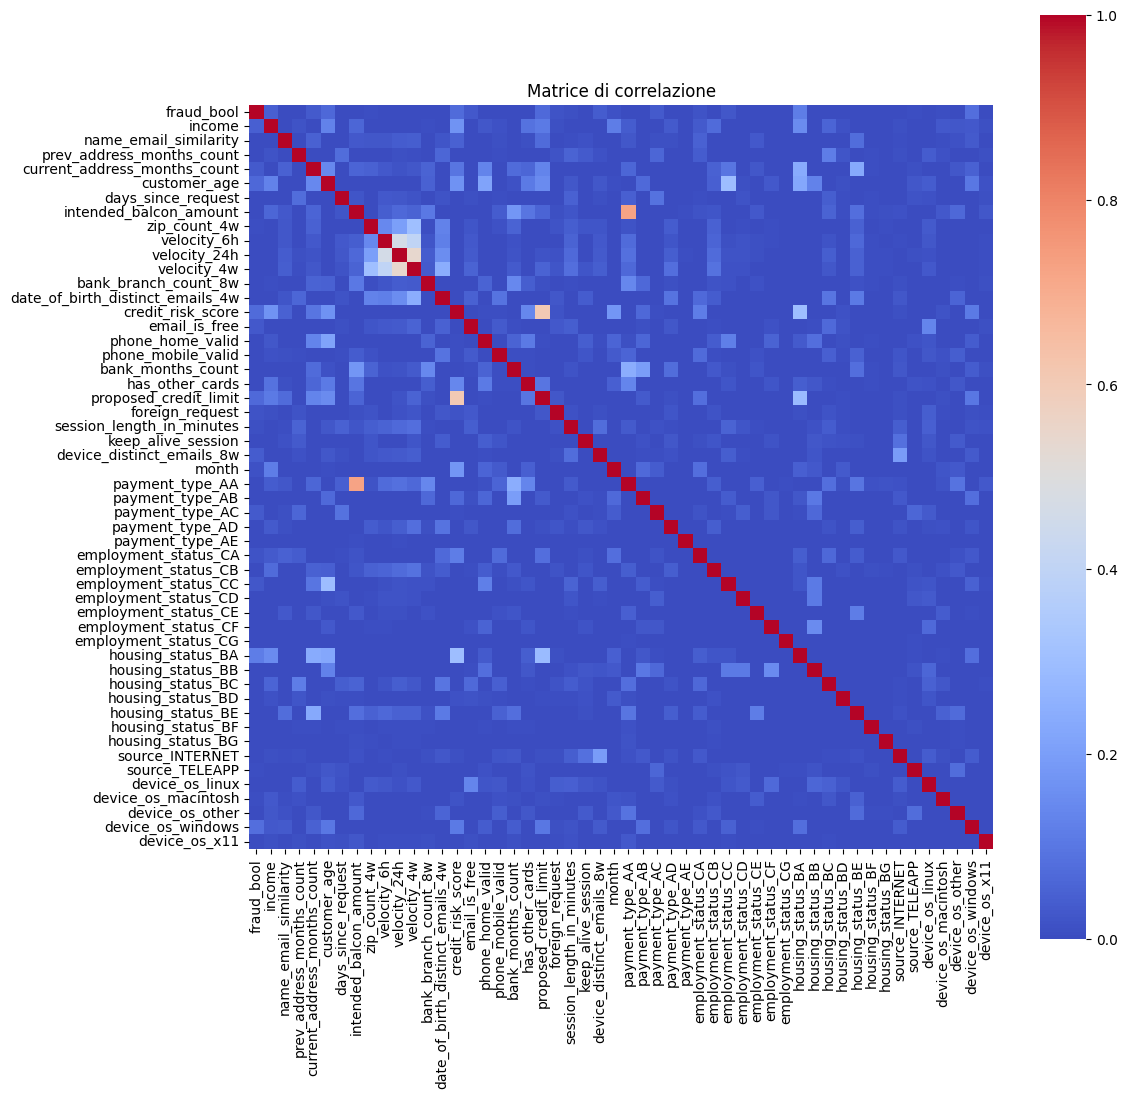

In [ ]:
fig = plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', vmin=0.0, square=True, yticklabels='auto')
plt.title('Matrice di correlazione')
plt.show()

In [ ]:
threshold = 0.5  # Sostituisci questo valore con il tuo threshold desiderato

# Trova tutte le coppie di colonne con correlazione superiore al threshold
high_correlation_pairs = (corr_matrix > threshold) & (corr_matrix < 1.0)
high_correlation_indices = zip(*np.where(high_correlation_pairs))

# Stampare le coppie di colonne correlate
for col1, col2 in high_correlation_indices:
    if col1 < col2:  # Per evitare di stampare la stessa coppia più volte (ad esempio, A-B e B-A)
        print(f"Le colonne '{df.columns[col1]}' e '{df.columns[col2]}' hanno una correlazione di {corr_matrix.iloc[col1, col2]:.2f}.")


NameError: ignored

In [ ]:
#scaling all the values of the df in (0,1) range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Transosed scaled_df back into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [ ]:
scaled_df.describe().transpose()

count      mean       std  min  \
fraud_bool                        1000000.0  0.011029  0.104438  0.0   
income                            1000000.0  0.578369  0.362928  0.0   
name_email_similarity             1000000.0  0.493694  0.289125  0.0   
prev_address_months_count         1000000.0  0.046142  0.114704  0.0   
current_address_months_count      1000000.0  0.204168  0.206076  0.0   
customer_age                      1000000.0  0.296113  0.150322  0.0   
days_since_request                1000000.0  0.013073  0.068596  0.0   
intended_balcon_amount            1000000.0  0.188283  0.157495  0.0   
zip_count_4w                      1000000.0  0.234616  0.150078  0.0   
velocity_6h                       1000000.0  0.345602  0.178216  0.0   
velocity_24h                      1000000.0  0.422767  0.180247  0.0   
velocity_4w                       1000000.0  0.487064  0.220638  0.0   
bank_branch_count_8w              1000000.0  0.077301  0.192715  0.0   
date_of_birth_distinct_emails_4w  1000000.0  0.243681  0.129072  0.0   
credit_risk_score                 1000000.0  0.538443  0.124654  0.0   
email_is_free                     1000000.0  0.529886  0.499106  0.0   
phone_home_valid                  1000000.0  0.417077  0.493076  0.0   
phone_mobile_valid                1000000.0  0.889676  0.313293  0.0   
bank_months_count                 1000000.0  0.358767  0.367178  0.0   
has_other_cards                   1000000.0  0.222988  0.416251  0.0   
proposed_credit_limit             1000000.0  0.170603  0.255267  0.0   
foreign_request                   1000000.0  0.025242  0.156859  0.0   
session_length_in_minutes         1000000.0  0.098332  0.092442  0.0   
keep_alive_session                1000000.0  0.576947  0.494044  0.0   
device_distinct_emails_8w         1000000.0  0.672771  0.060254  0.0   
month                             1000000.0  0.469811  0.315713  0.0   
payment_type_AA                   1000000.0  0.258249  0.437672  0.0   
payment_type_AB                   1000000.0  0.370554  0.482953  0.0   
payment_type_AC                   1000000.0  0.252071  0.434202  0.0   
payment_type_AD                   1000000.0  0.118837  0.323597  0.0   
payment_type_AE                   1000000.0  0.000289  0.016998  0.0   
employment_status_CA              1000000.0  0.730252  0.443829  0.0   
employment_status_CB              1000000.0  0.138288  0.345202  0.0   
employment_status_CC              1000000.0  0.037758  0.190611  0.0   
employment_status_CD              1000000.0  0.026522  0.160682  0.0   
employment_status_CE              1000000.0  0.022693  0.148923  0.0   
employment_status_CF              1000000.0  0.044034  0.205171  0.0   
employment_status_CG              1000000.0  0.000453  0.021279  0.0   
housing_status_BA                 1000000.0  0.169675  0.375347  0.0   
housing_status_BB                 1000000.0  0.260965  0.439161  0.0   
housing_status_BC                 1000000.0  0.372143  0.483376  0.0   
housing_status_BD                 1000000.0  0.026161  0.159614  0.0   
housing_status_BE                 1000000.0  0.169135  0.374871  0.0   
housing_status_BF                 1000000.0  0.001669  0.040819  0.0   
housing_status_BG                 1000000.0  0.000252  0.015873  0.0   
source_INTERNET                   1000000.0  0.992952  0.083656  0.0   
source_TELEAPP                    1000000.0  0.007048  0.083656  0.0   
device_os_linux                   1000000.0  0.332712  0.471185  0.0   
device_os_macintosh               1000000.0  0.053826  0.225674  0.0   
device_os_other                   1000000.0  0.342728  0.474622  0.0   
device_os_windows                 1000000.0  0.263506  0.440535  0.0   
device_os_x11                     1000000.0  0.007228  0.084710  0.0   

                                       25%       50%       75%  max  
fraud_bool                        0.000000  0.000000  0.000000  1.0  
income                            0.250000  0.625000  0.875000  1.0  
name_email_

In [ ]:
X = scaled_df.drop('fraud_bool', axis=1)
y = scaled_df['fraud_bool']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
neg, pos = np.bincount(df['fraud_bool'])
print(f'number of negative label {neg} and the positive {pos}')

number of negative label 988971 and the positive 11029


In [ ]:
total = neg+pos
print(total)
print(neg)
print(pos)
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

1000000
988971
11029
Weight for class 0: 0.51
Weight for class 1: 45.34


In [ ]:
# Importing the necessary libraries for metrics and evaluation
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, auc, roc_curve

In [ ]:
def print_cls_report(y_test, y_pred, title):
    # Calculate the classification report
    default_report = classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud'])

    # Calculate precision, recall, f1 score and support for each class
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Print the title and the default classification report
    print(title)
    print('*****' * 10)
    print(default_report)

    # Return the recall scores for each class
    return recall

In [ ]:
def plot_con_matrix(ax, y_test, y_pred, title):
    # Define the classes of the classification problem
    classes = ['No Fraud', 'Fraud']

    # Compute the confusion matrix
    con_matrix = confusion_matrix(y_test, y_pred)

    # Compute the values for true negatives, false positives, false negatives, and true positives
    tn, fp, fn, tp = con_matrix.ravel()

    # Compute the false positive rate
    fpr = fp / (fp + tn)

    # Plot the confusion matrix using a heatmap
    sns.heatmap(con_matrix, annot=True, fmt=".0f", ax=ax)

    # Define the labels for the plot
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    # Add labels to the plot
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(f'{title} with {fpr*100:.2f}% FPR')

In [ ]:
def print_cv_results(model):
    # Get the parameter and score arrays from the cv_results_ dictionary
    means = model.cv_results_['mean_test_score']
    params = model.cv_results_['params']

    # Combine the arrays using zip()
    combined_results = zip(means, params)

    # Sort the combined array by mean_test_score in descending order
    sorted_results = sorted(combined_results, key=lambda x: x[0], reverse=True)

    # Print the mean test score and the hyperparameters as a formatted string
    for mean, param in sorted_results:
        print("mean_test_score: %f, params: %r" % (mean, param))

In [ ]:
def plot_roc_curves(fpr, tpr):
    plt.figure(figsize=(8, 8))
    # Compute the ROC AUC score
    roc_auc_score = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'Random forest classifier (AUC={roc_auc_score:.2f})')

    # Plot the random classifier curve
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # Set the plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid(True)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [ ]:
def test_classifier(classifier, X_test, y_test):
    """
    Evaluates a binary classifier by generating ROC curves, classification reports, and confusion matrices.

    Parameters:
    -----------
    classifier : classifier object
        Binary classifier object to be evaluated.
    X_test : numpy.ndarray or pandas.DataFrame
        Test feature data.
    y_test : numpy.ndarray or pandas.Series
        Test target labels.

    Returns:
    --------
    tuple : A tuple containing four values - false positive rate (fpr), true positive rate (tpr),
            default recall, and target recall.
    """

    # Predict class probabilities and labels using the trained classifier
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_prob) #could be with y_pred to have the percentage of tp and fp

    # Choose a false positive rate threshold based on the ROC curve
    target_fpr = 0.05
    threshold_idx = np.argmin(np.abs(fpr - target_fpr))
    threshold = thresholds[threshold_idx]
    #threshold = 0.95

    # Make predictions on the testing set using the threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)

    # Print the classification report for both default and target threshold
    default_recall = print_cls_report(y_test, y_pred, title="Default Threshold")
    target_recall = print_cls_report(y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Plot confusion matrix
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    default_matrix = plot_con_matrix(ax1, y_test, y_pred, title='Default Threshold @ 0.50')
    target_matrix = plot_con_matrix(ax2, y_test, y_pred_threshold, title=f'Target Threshold @ {threshold:.2f}')

    # Adjust subplots for better visibility
    plt.tight_layout()

    # Display the plots
    plt.show()

    return fpr, tpr, default_recall, target_recall

In [ ]:
#Random forest calssifier
rf = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=10, max_features='log2', criterion='entropy', class_weight= class_weights, verbose=1 )
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   51.4s finished


RandomForestClassifier(class_weight={0: 0.505575997678395,
                                     1: 45.33502584096473},
                       criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=40, random_state=42, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.9s finished


Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.86      0.92    197776
       Fraud       0.05      0.71      0.10      2224

    accuracy                           0.86    200000
   macro avg       0.52      0.79      0.51    200000
weighted avg       0.99      0.86      0.91    200000

Target Threshold @ 0.66
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      0.95      0.97    197776
       Fraud       0.10      0.49      0.16      2224

    accuracy                           0.94    200000
   macro avg       0.55      0.72      0.57    200000
weighted avg       0.98      0.94      0.96    200000



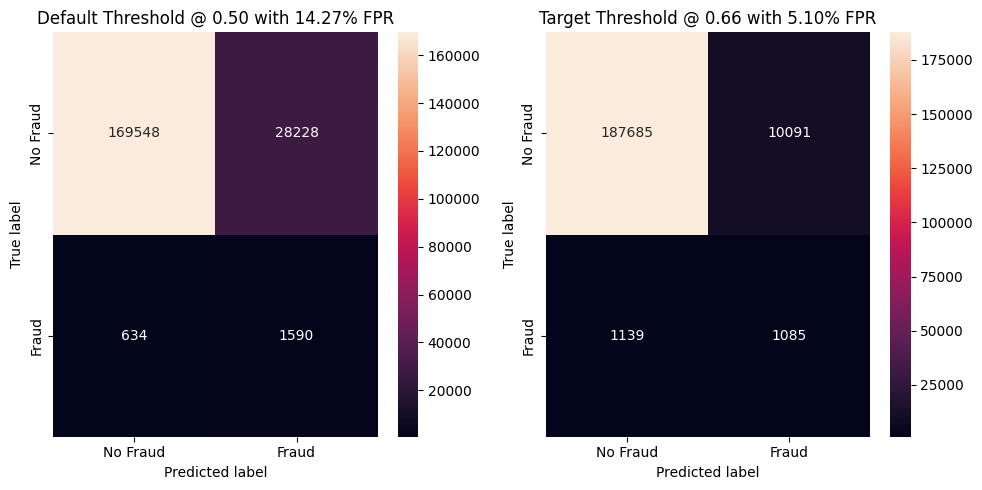

In [ ]:
fpr, tpr, default_recall, target_recall = test_classifier(rf, X_test, y_test)

In [ ]:
fpr

array([0.00000000e+00, 5.05622522e-06, 5.05622522e-06, ...,
       9.43193310e-01, 9.43193310e-01, 1.00000000e+00])

[Significato delle metriche](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)

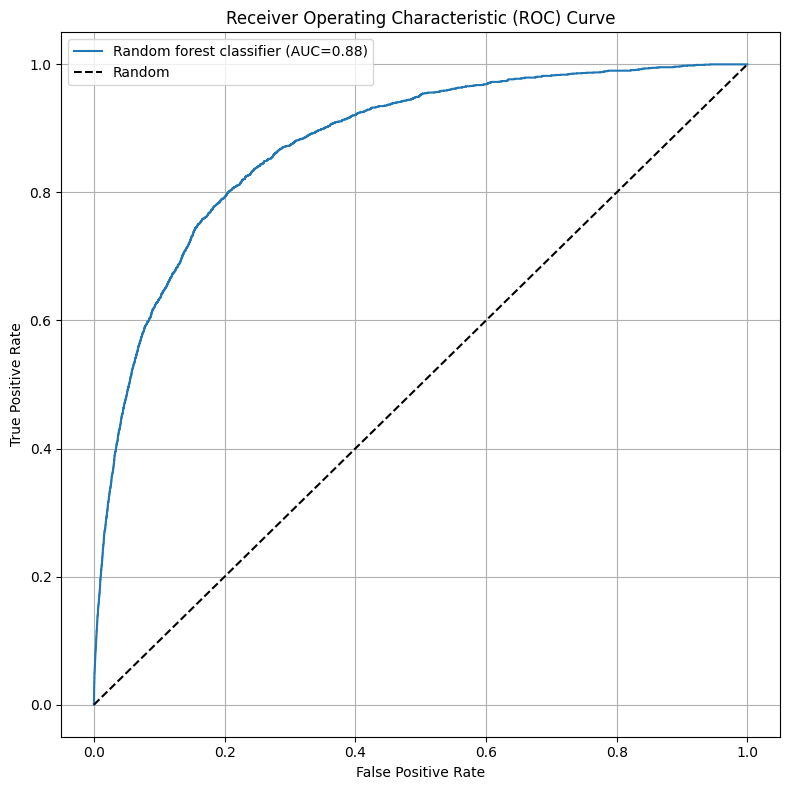

In [ ]:
plot_roc_curves(fpr,tpr)

#Try with resampling

In [ ]:
new_df = df.copy()

In [ ]:
X_u = new_df.drop('fraud_bool', axis=1)
y_u = new_df['fraud_bool']


In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter
# Perform NearMiss undersampling to handle imbalanced data
print(f'Test dataset samples per class {Counter(y_u)}')

# Define the NearMiss undersampling object with a sampling strategy of 0.1 and all available CPU cores
nm = NearMiss(sampling_strategy=0.1, n_jobs=-1)

# Perform NearMiss undersampling on the feature matrix X and target variable y
X_nm_u, y_nm_u = nm.fit_resample(X_u, y_u)


# Print the number of occurrences of each class in the resampled dataset
print('Resampled dataset shape %s' % Counter(y_nm_u))

Test dataset samples per class Counter({0: 988971, 1: 11029})
Resampled dataset shape Counter({0: 110290, 1: 11029})


In [ ]:
neg, pos = np.bincount(y_nm_u)
print(f'number of negative label {neg} and the positive {pos}')

number of negative label 110290 and the positive 11029


In [ ]:
total = neg+pos
print(total)
print(neg)
print(pos)
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weights = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

121319
110290
11029
Weight for class 0: 0.55
Weight for class 1: 5.50


In [ ]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_nm_u, y_nm_u, test_size=0.25, random_state=42, stratify=y_nm_u)

In [ ]:
#rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, max_features='log2')
rf_u = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=10, max_features='log2', criterion='entropy', class_weight= class_weights )
rf_u.fit(X_train_u, y_train_u)

RandomForestClassifier(class_weight={0: 0.5499999999999999, 1: 5.5},
                       criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=40, random_state=42)

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.98      0.90      0.94     27573
       Fraud       0.44      0.81      0.57      2757

    accuracy                           0.89     30330
   macro avg       0.71      0.85      0.75     30330
weighted avg       0.93      0.89      0.90     30330

Target Threshold @ 0.62
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.97      0.95      0.96     27573
       Fraud       0.57      0.67      0.62      2757

    accuracy                           0.92     30330
   macro avg       0.77      0.81      0.79     30330
weighted avg       0.93      0.92      0.93     30330



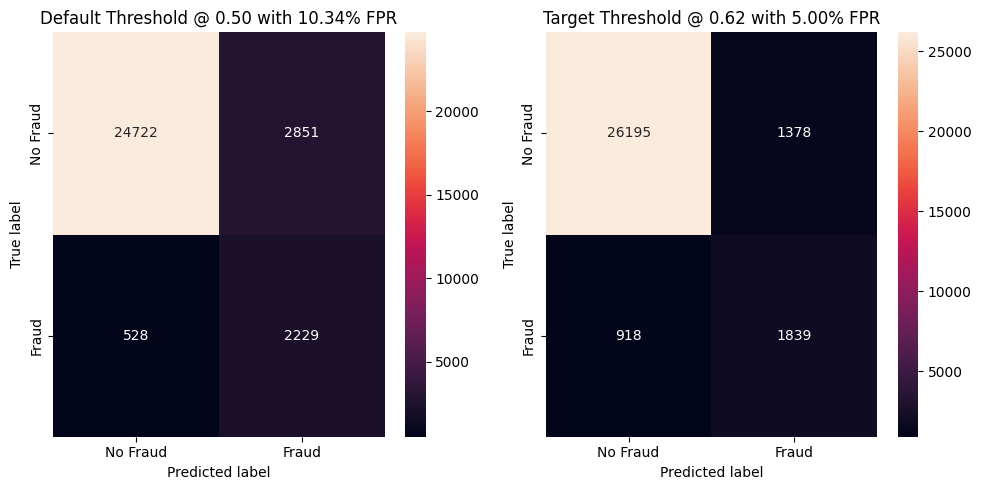

In [ ]:
fpr_u, tpr_u, default_recall_u, target_recall_u = test_classifier(rf_u, X_test_u, y_test_u)

In [ ]:
Counter(y_test_u)

Counter({0: 27573, 1: 2757})

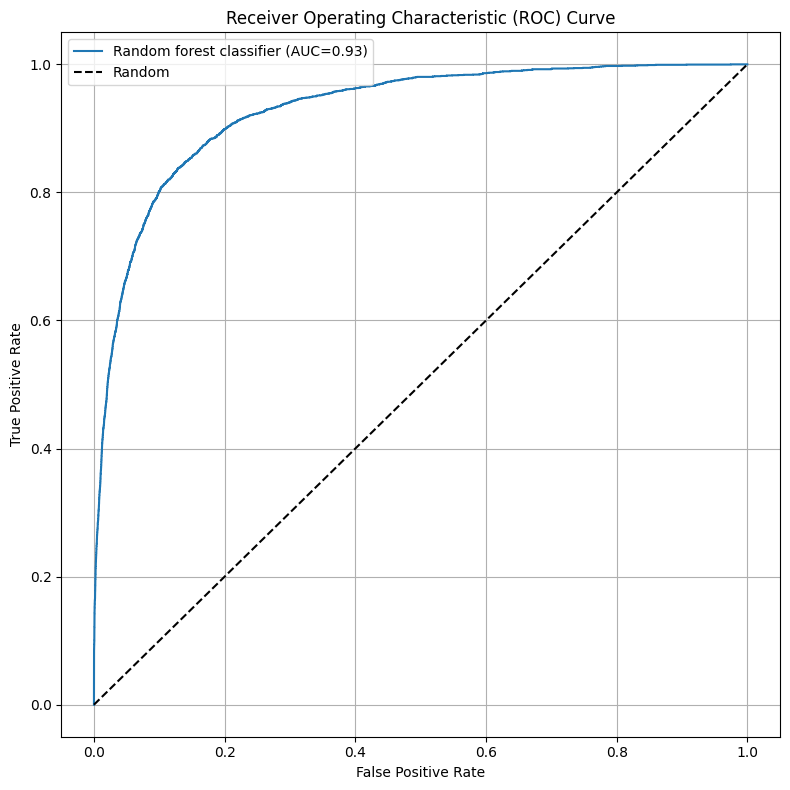

In [ ]:
plot_roc_curves(fpr_u,tpr_u)

In [ ]:
y_pred = rf_u.predict(X_test_u)
y_prob = rf_u.predict_proba(X_test_u)[:, 1]

    # Calculate the false positive rate and true positive rate for different threshold values
fpr, tpr, thresholds = roc_curve(y_test_u, y_prob) #could be with y_pred to have the percentage of tp and fp

    # Choose a false positive rate threshold based on the ROC curve
target_fpr = 0.05
threshold_idx = np.argmin(np.abs(fpr - target_fpr))
threshold = thresholds[threshold_idx]
#threshold = 0.95

    # Make predictions on the testing set using the threshold
y_pred_threshold = (y_prob >= threshold).astype(int)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test_u, y_pred_threshold)

0.5716506061548026

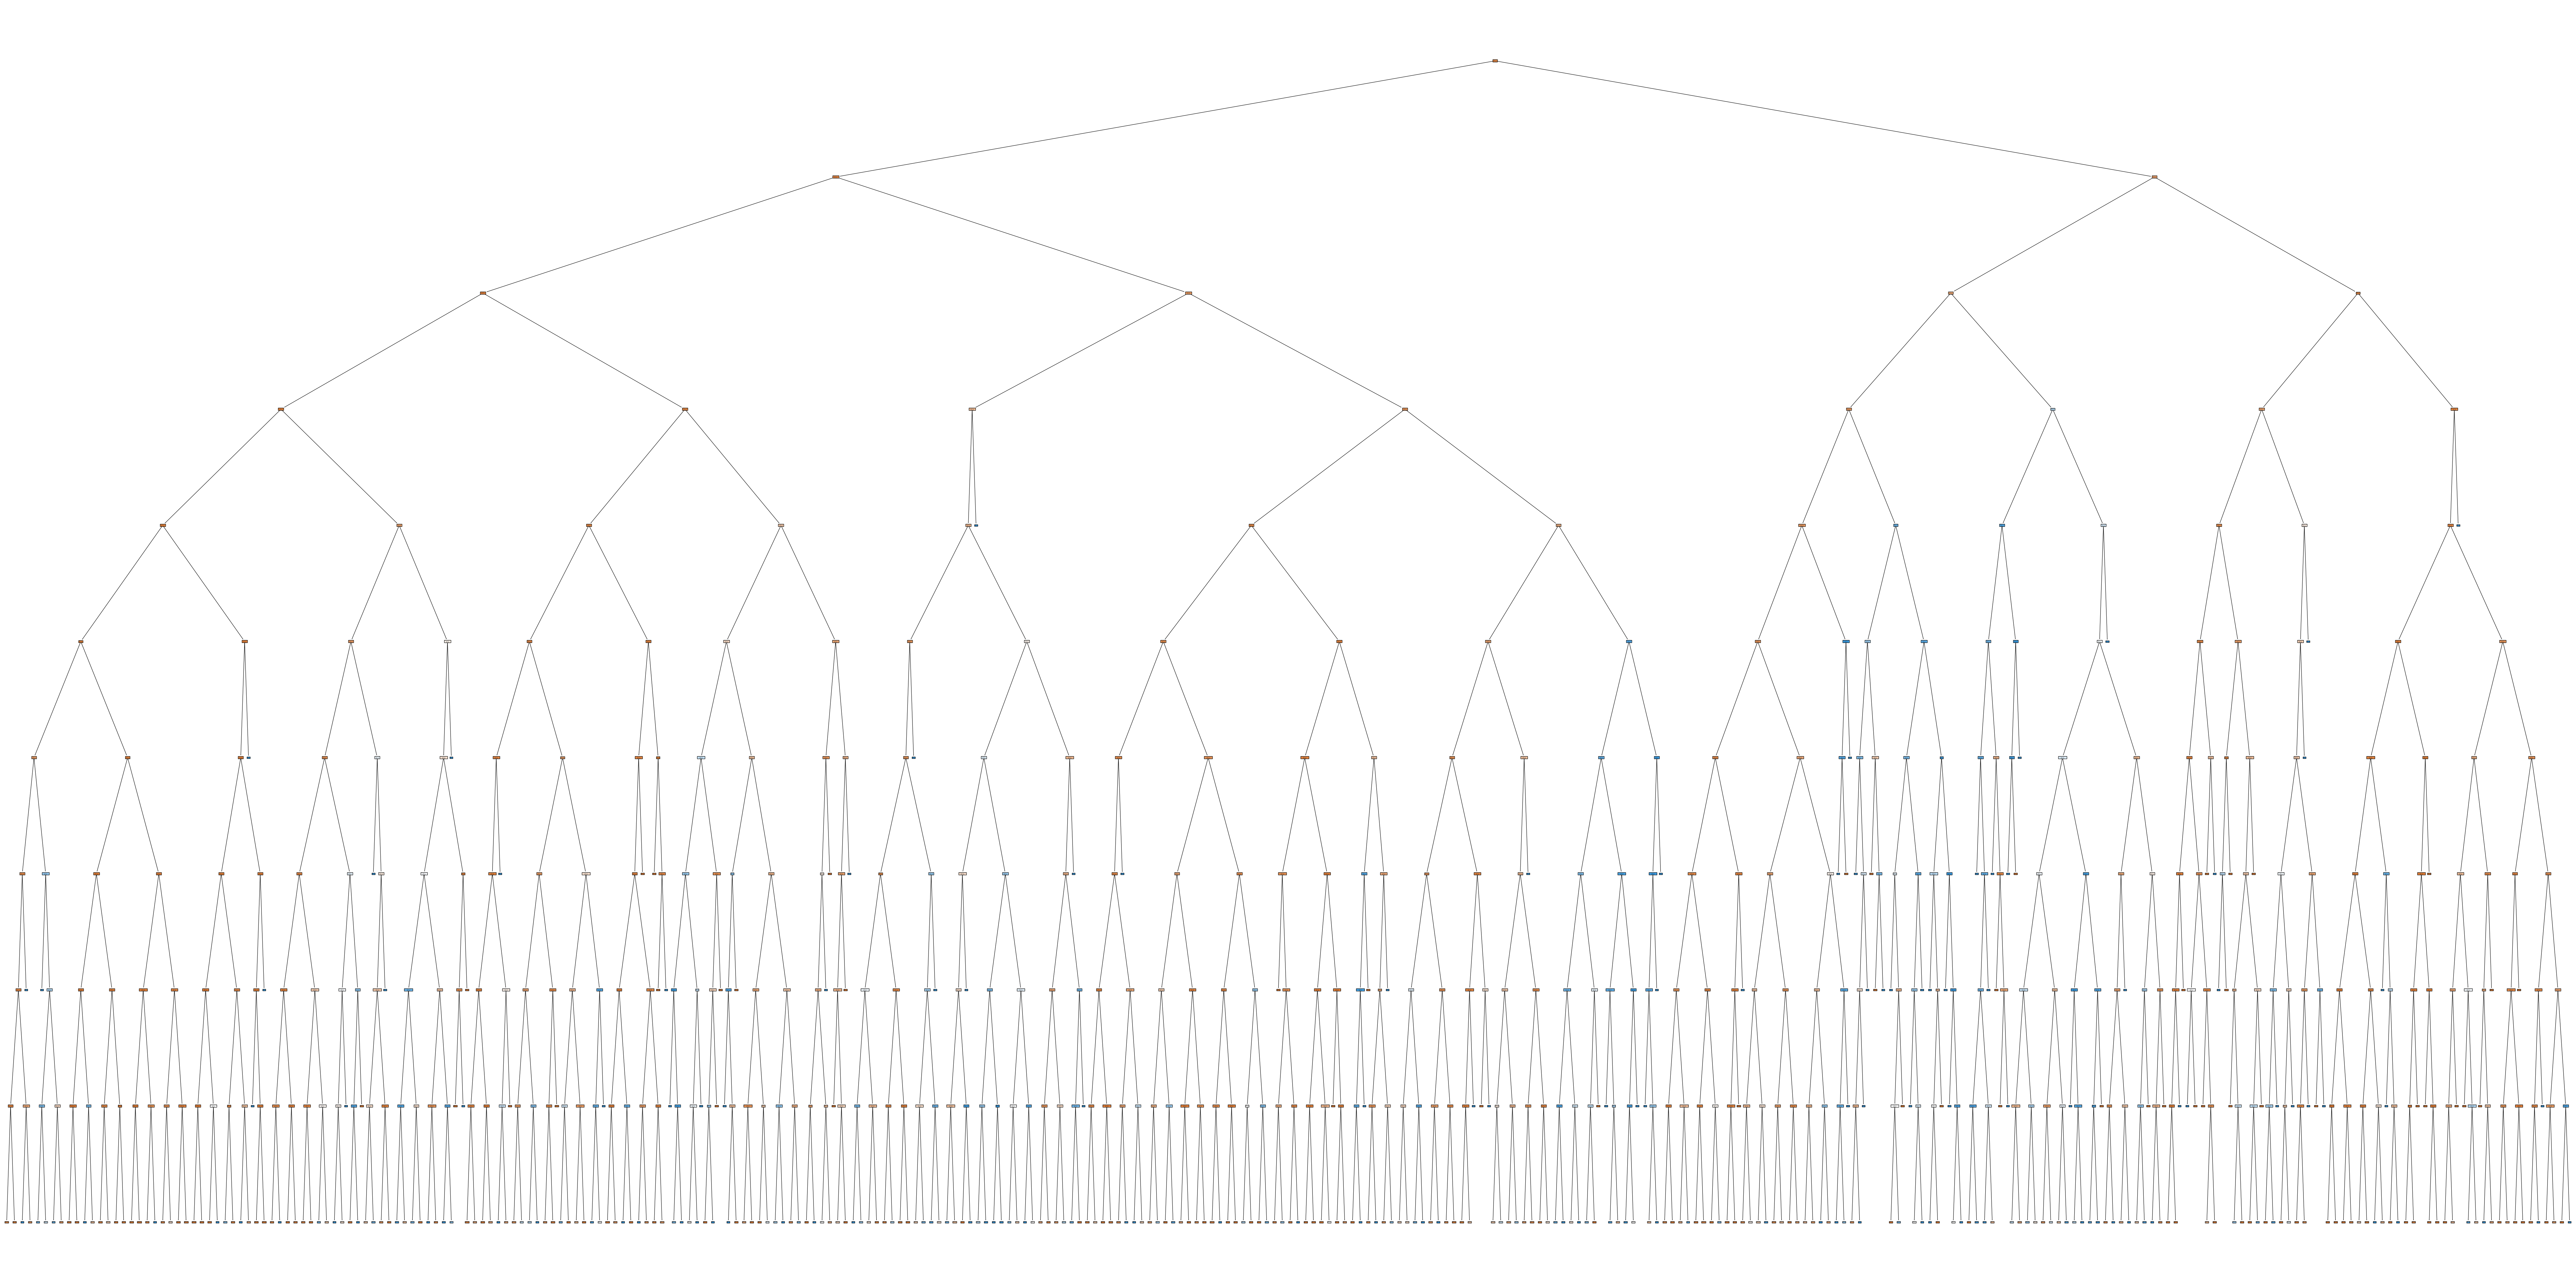

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(120,60))
plot_tree(rf_u.estimators_[5], feature_names = X.columns,class_names=['No Fraud', "Fraud"],filled=True);

#Try with a kv cross validation and smotec

In [ ]:
# Import the necessary libraries for oversampling imbalanced datasets
from imblearn.over_sampling import SMOTE
# Import necessary modules for hyperparameter tuning
#from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, GridSearchCV

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
Counter(y_resampled)

Counter({0.0: 791195, 1.0: 791195})

In [ ]:
# Instantiate a RandomForestClassifier model
rf_over = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=10, max_features='log2', criterion='entropy')
# Fit the oversampled data to the model
rf_over.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=40, random_state=42)

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       1.00      0.89      0.94    197776
       Fraud       0.06      0.64      0.11      2224

    accuracy                           0.89    200000
   macro avg       0.53      0.76      0.53    200000
weighted avg       0.99      0.89      0.93    200000

Target Threshold @ 0.62
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      0.95      0.97    197776
       Fraud       0.09      0.45      0.15      2224

    accuracy                           0.94    200000
   macro avg       0.54      0.70      0.56    200000
weighted avg       0.98      0.94      0.96    200000



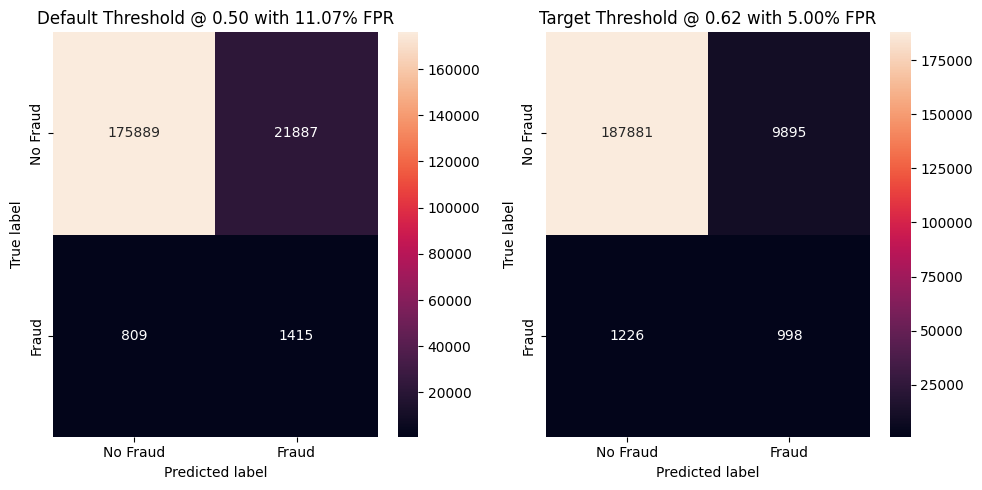

In [ ]:
fpr_o, tpr_o, default_recall_o, target_recall_o = test_classifier(rf_over, X_test, y_test)

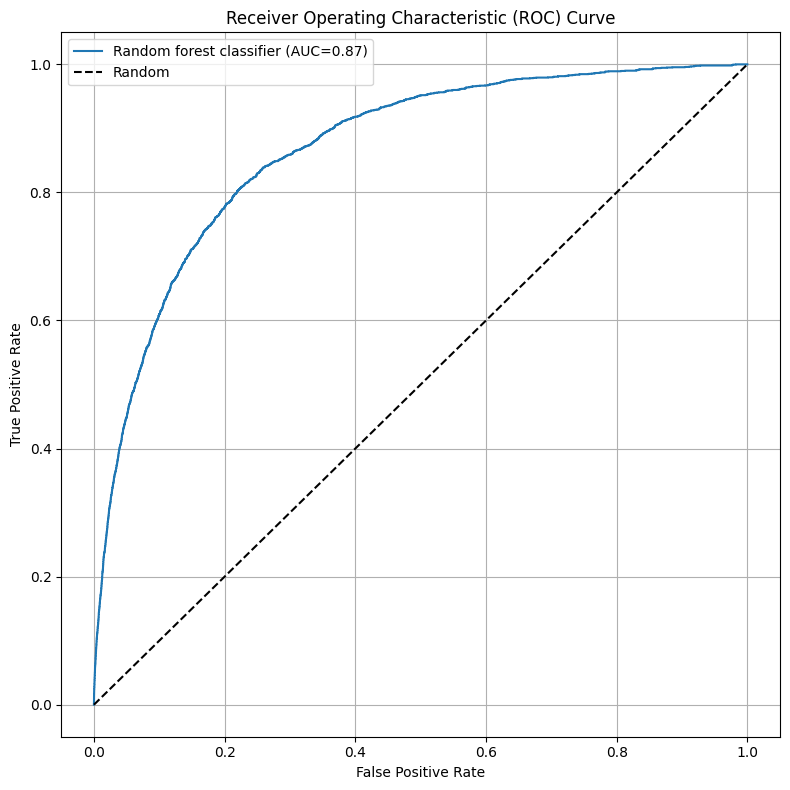

In [ ]:
plot_roc_curves(fpr_o, tpr_o)

mean_test_score: 0.804578, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.803375, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.801238, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.796692, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.795376, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.793951, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.792608, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.791530, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 8, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.781903, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 6, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.781883, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 6, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.778993, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 6, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.773341, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.772742, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.768904, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.764461, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 4, 'randomforestclassifier__criterion': 'entropy'}
mean_test_score: 0.754089, params: {'randomforestclassifier__n_estimators': 60, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.752026, params: {'randomforestclassifier__n_estimators': 80, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.746598, params: {'randomforestclassifier__n_estimators': 20, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.745963, params: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'gini'}
mean_test_score: 0.742712, params: {'randomforestclassifier__n_estimators': 40, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 2, 'randomforestclassifier__criterion': 'entropy'}


#TRY to use the data without scaling and try to delete the class weighted

In [ ]:
A_df= df.copy()

In [ ]:
A_df.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           1     0.9               0.166828                         -1   
1           1     0.9               0.296286                         -1   
2           1     0.9               0.044985                         -1   
3           1     0.9               0.159511                         -1   
4           1     0.9               0.596414                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            88            50            0.020925   
1                           144            50            0.005418   
2                           132            40            3.108549   
3                            22            50            0.019079   
4                           218            50            0.004441   

   intended_balcon_amount  zip_count_4w   velocity_6h  ...  housing_status_BE  \
0               -1.331345           769  10650.765523  ...                  0   
1               -0.816224           366    534.047319  ...                  0   
2               -0.755728           870   4048.534263  ...                  0   
3               -1.205124           810   3457.064063  ...                  0   
4               -0.773276           890   5020.341679  ...                  0   

   housing_status_BF  housing_status_BG  source_INTERNET  source_TELEAPP  \
0                  0                  0                1               0   
1                  0                  0                1               0   
2                  0                  0                1               0   
3                  0                  0                1               0   
4                  0                  0                1               0   

   device_os_linux  device_os_macintosh  device_os_other  device_os_windows  \
0                0                    0                0                  1   
1                0                    0                0                  1   
2                0                    0                1                  0   
3                1                    0                0                  0   
4                0                    1                0                  0   

   device_os_x11  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 52 columns]

In [ ]:
X_not_scaled = A_df.drop('fraud_bool', axis=1)
y_not_scaled = A_df['fraud_bool']

In [ ]:
# Splitting the data into training and testing sets
X_train_not_scaled, X_test_not_scaled, y_train_not_scaled, y_test_not_scaled = train_test_split(X_not_scaled, y_not_scaled, test_size=0.2, random_state=42)

In [ ]:
rf_not_scaled = RandomForestClassifier(n_estimators=40, random_state=42, max_depth=10, max_features='log2', criterion='entropy')
rf_not_scaled.fit(X_train_not_scaled, y_train_not_scaled)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=40, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Default Threshold
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      1.00      0.99    197776
       Fraud       0.00      0.00      0.00      2224

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

Target Threshold @ 0.04
**************************************************
              precision    recall  f1-score   support

    No Fraud       0.99      0.95      0.97    197776
       Fraud       0.10      0.51      0.17      2224

    accuracy                           0.95    200000
   macro avg       0.55      0.73      0.57    200000
weighted avg       0.98      0.95      0.96    200000



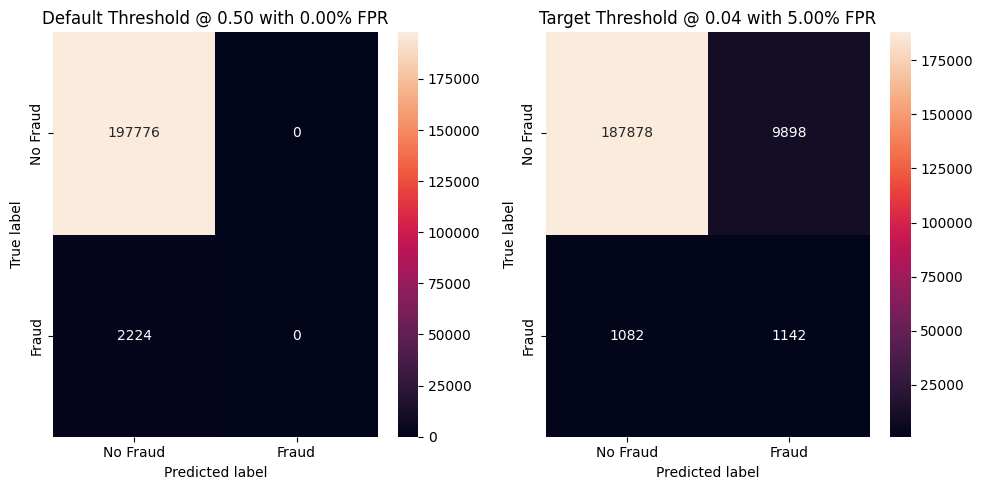

In [ ]:
fpr_n, tpr_n, default_recall_n, target_recall_n = test_classifier(rf_not_scaled, X_test_not_scaled, y_test_not_scaled)

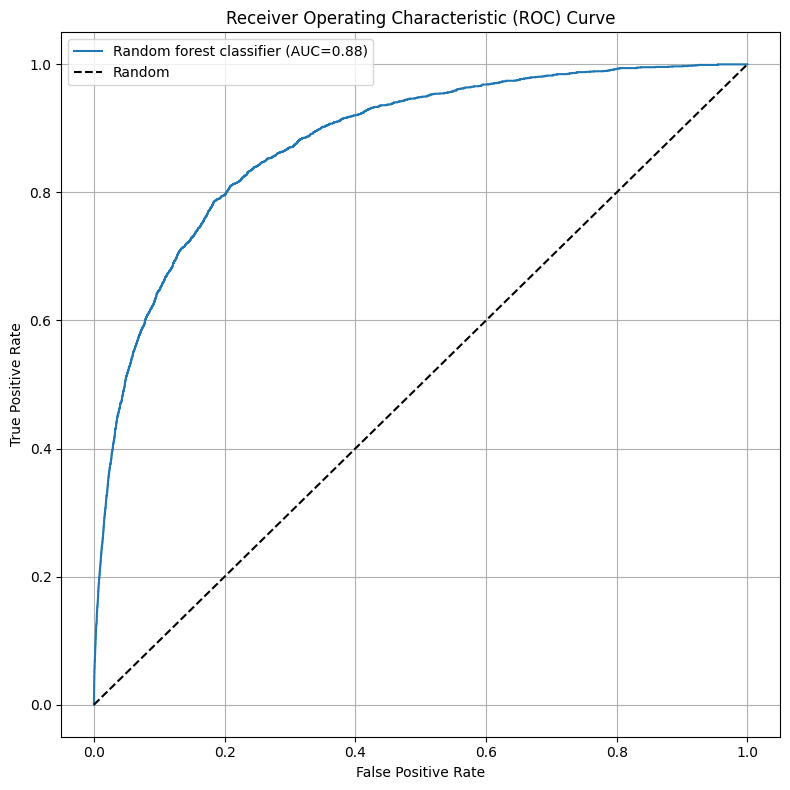

In [ ]:
plot_roc_curves(fpr_n, tpr_n)

In [ ]:
from sklearn.tree import export_text

tree_index = 0  # Replace with the desired tree index

# Get the decision path of the selected tree
decision_path = rf_not_scaled.estimators_[tree_index].decision_path(X_train_not_scaled)

# Convert the decision path to a text format
tree_text = export_text(rf_not_scaled.estimators_[tree_index], feature_names=X_train.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
print(tree_text)

|--- income <= 0.85
|   |--- housing_status_BA <= 0.50
|   |   |--- has_other_cards <= 0.50
|   |   |   |--- bank_months_count <= 29.50
|   |   |   |   |--- payment_type_AC <= 0.50
|   |   |   |   |   |--- email_is_free <= 0.50
|   |   |   |   |   |   |--- phone_home_valid <= 0.50
|   |   |   |   |   |   |   |--- device_os_windows <= 0.50
|   |   |   |   |   |   |   |   |--- current_address_months_count <= 34.50
|   |   |   |   |   |   |   |   |   |--- prev_address_months_count <= 104.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- prev_address_months_count >  104.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- current_address_months_count >  34.50
|   |   |   |   |   |   |   |   |   |--- velocity_6h <= 2055.67
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- velocity_6h >  2055.67
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|  

#TRY with H20

In [ ]:
!apt-get install openjdk-8-jdk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs libice-doc libsm-doc libxt-doc openjdk-8-demo openjdk-8-source visualvm
  libnss-mdns fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libice-dev librsvg2-common libsm-dev
  libxkbfile1 libxt-dev libxtst6 libxxf86dga1 openjdk-8-jdk
  

In [ ]:
!java -version

openjdk version "11.0.19" 2023-04-18
OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1)
OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)


In [ ]:
!pip install H2O

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for H2O: filename=h2o-3.42.0.1-py2.py3-none-any.whl size=249152215 sha256=b86fa2864428de1dba716b838cf6fb4a016fccafb97e734a653af220ef5302e3
  Stored in directory: /root/.cache/pip/wheels/2e/2f/04/ef0554c89bcb5d38a6fc082a87f497933109faefd94dcdc3d2
Successfully built H2O


In [ ]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpgeyg1637
  JVM stdout: /tmp/tmpgeyg1637/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpgeyg1637/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         06 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.1
H2O_cluster_version_age:    1 month and 3 days
H2O_cluster_name:           H2O_from_python_unknownUser_30tgvq
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.6 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
df = h2o.import_file(r'/content/drive/MyDrive/Business Analytics Project/Base.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df['fraud_bool'] = df['fraud_bool'].asfactor()

In [ ]:
X = df.drop('fraud_bool', axis=1)
y = df['fraud_bool']
#transform y in to categorical type


In [ ]:
def categorical_features():
  res = []
  for i in df.columns:
    if type(df[i][0]) == str:
      res.append(i)
  return res

In [ ]:
#y = y.astype('category')
train, valid = df.split_frame(ratios=[.8], seed=1234)

In [ ]:
#train_data = h2o.H2OFrame(X.assign(target=y))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model = H2ORandomForestEstimator( seed = 42, balance_classes = False, stopping_metric= 'AUC')

In [ ]:
model.train(x=X.columns, y='fraud_bool', training_frame=train, validation_frame=valid)

drf Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [device_fraud_count]
  warnings.warn(mesg["message"], RuntimeWarning)
/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: Stopping metric is ignored for _stopping_rounds=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1690189189544_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          5.64242e+06            20           20           20            7928          9997          8962.2

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.010530827886092659
RMSE: 0.10261982209150754
LogLoss: 0.06500575244093276
Mean Per-Class Error: 0.404823880224649
AUC: 0.8272348150759316
AUCPR: 0.10704380364309926
Gini: 0.6544696301518631

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15255165454859124
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      782544  8870   0.0112   (8870.0/791414.0)
1      7063    1783   0.7984   (7063.0/8846.0)
Total  789607  10653  0.0199   (15933.0/800260.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.152552     0.182881  159
max f2                       0.0741377    0.23514   239
max f0point5                 0.206926     0.199843  120
max accuracy                 0.579281     0.988966  13
max precision                0.846154     1         0
max recall                   5.62696e-06  1         399
max specificity              0.846154     1         0
max absolute_mcc             0.131884     0.175581  176
max min_per_class_accuracy   0.00474847   0.762831  367
max mean_per_class_accuracy  0.00424063   0.765293  369
max tns                      0.846154     791414    0
max fns                      0.846154     8845      0
max fps                      5.62696e-06  791414    399
max tps                      5.62696e-06  8846      399
max tnr                      0.846154     1         0
max fnr                      0.846154     0.999887  0
max fpr                      5.62696e-06  1         399
max tpr                      5.62696e-06  1         399

Gains/Lift Table: Avg response rate:  1.11 %, avg score:  1.23 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100005                   0.172518           17.2612   17.2612            0.190803         0.251779     0.190803                    0.251779            0.17262         0.17262                    1626.12   1626.12            0.164438
2        0.0201734                   0.125              7.68976   12.4346            0.0850018        0.14476      0.13745                     0.197812            0.0782274       0.250848                   668.976   1143.46            0.233253
3        0.0302002                   0.1                5.61465   10.1703            0.0620638        0.110721     0.112421                    0.168897            0.0562966       0.307144                   461.465   917.028            0.28004
4        0.0400007                   0.0819455          4.91373   8.88238            0.054316         0.09002      0.098185                    0.149571            0.0481574       0.355302                   391.373   788.238            0.318825
5        0.05                        0.071305           4.20561   7.94709            0.0464884        0.075658  

In [ ]:
print(model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_model_python_1690104698963_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          5.64242e+06            20           20           20            7928          9997          8962.2

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.010530827886092659
RMSE: 0.10261982209150754
LogLoss: 0.06500575244093276
Mean Per-Class Error: 0.404823880224649
AUC: 0.8272348150759316
AUCPR: 0.10704380364309926
Gini: 0.6544696301518631

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.15255165454859124
       0       1      Error    Rate
-----  ------  -----  -------  ----------------

In [ ]:
perf = model.model_performance(valid=True)
perf

ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.010158210126332319
RMSE: 0.10078794633453109
LogLoss: 0.051372030996693845
Mean Per-Class Error: 0.39660445586077175
AUC: 0.845665129376683
AUCPR: 0.12811874645371124
Gini: 0.6913302587533661

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14104537460021677
       0       1     Error    Rate
-----  ------  ----  -------  -----------------
0      195695  1862  0.0094   (1862.0/197557.0)
1      1711    472   0.7838   (1711.0/2183.0)
Total  197406  2334  0.0179   (3573.0/199740.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.141045     0.208988  136
max f2                       0.0718435    0.264749  210
max f0point5                 0.195667     0.219712  97
max accuracy                 0.494299     0.989126  10
max precision                0.72         1         0
max recall                   1.12337e-05  1         399
max specificity              0.72         1         0
max absolute_mcc             0.116985     0.201215  158
max min_per_class_accuracy   0.00957294   0.759505  343
max mean_per_class_accuracy  0.00551962   0.763205  358
max tns                      0.72         197557    0
max fns                      0.72         2182      0
max fps                      1.12337e-05  197557    399
max tps                      1.12337e-05  2183      399
max tnr                      0.72         1         0
max fnr                      0.72         0.999542  0
max fpr                      1.12337e-05  1         399
max tpr                      1.12337e-05  1         399

Gains/Lift Table: Avg response rate:  1.09 %, avg score:  1.23 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010003                    0.150462           19.3712   19.3712            0.211712         0.223946     0.211712                    0.223946            0.19377         0.19377                    1837.12   1837.12            0.185798
2        0.020001                    0.106826           9.11772   14.2457            0.0996495        0.125799     0.155695                    0.174884            0.091159        0.284929                   811.772   1324.57            0.267855
3        0.030004                    0.084597           6.64024   11.7101            0.0725726        0.0952511    0.127983                    0.148336            0.0664224       0.351351                   564.024   1071.01            0.324898
4        0.040002                    0.07033            5.36067   10.1232            0.0585879        0.0778401    0.110638                    0.130716            0.053596        0.404947                   436.067   912.318            0.368978
5        0.05001                     0.0611765          3.89061   8.87591            0.0425213        0.0649629    0.0970067                   0.117558            0.0389372       0.443885                   289.061   787.591            0.398227
6        0.1                         0.034928           2.60245   5.73981            0.0284427        0.0459986    0.0627316                   0.0817852           0.130096        0.573981                   160.245   473.981            0.479218
7        0.15                        0.0223528          1.64911   4.37624            0.0180234        0.0267795    0.0478288                   0.06345             0.0824553       0.656436                   64.9107   337.624    

In [ ]:
predictions = model.predict(valid)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions

predict        p0           p1
---------  --------  -----------
        0  0.949707  0.0502931
        0  0.872729  0.127271
        0  0.953048  0.0469517
        1  0.723764  0.276236
        1  0.857495  0.142505
        0  0.994938  0.00506246
        1  0.638969  0.361031
        0  0.999763  0.000236603
        0  0.919231  0.0807692
        0  0.99976   0.000239633
[199740 rows x 3 columns]

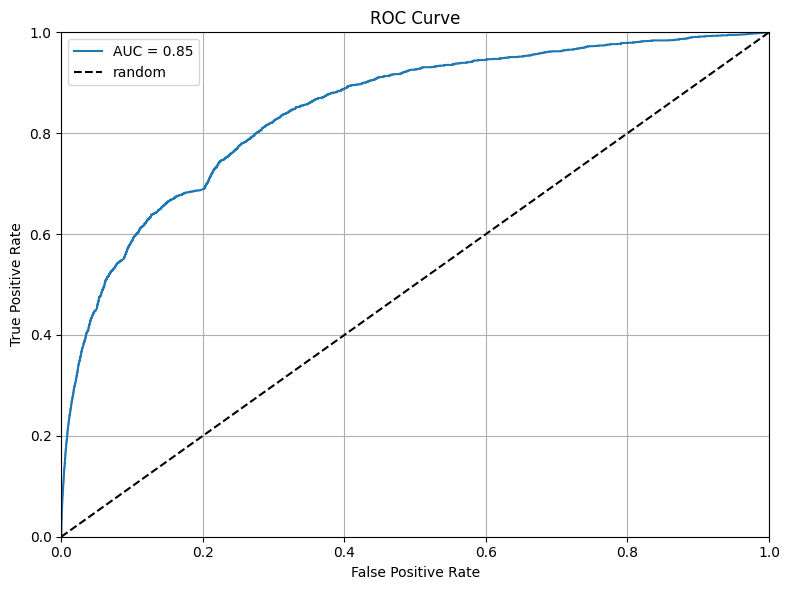

In [ ]:
prediction_frame = predictions.as_data_frame()

# Get the actual labels and predicted probabilities for the positive class
actual_labels = valid['fraud_bool'].as_data_frame().values.flatten()
positive_class_probabilities = prediction_frame['p1']

# Compute the false positive rate, true positive rate, and thresholds
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(actual_labels, positive_class_probabilities)

# Compute the AUC (Area Under the Curve)
from sklearn.metrics import auc
auc_score = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label= 'random')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

predicted_labels = h2o.as_list(predictions['predict']).values.flatten()
true_labels = h2o.as_list(valid['fraud_bool']).values.flatten()

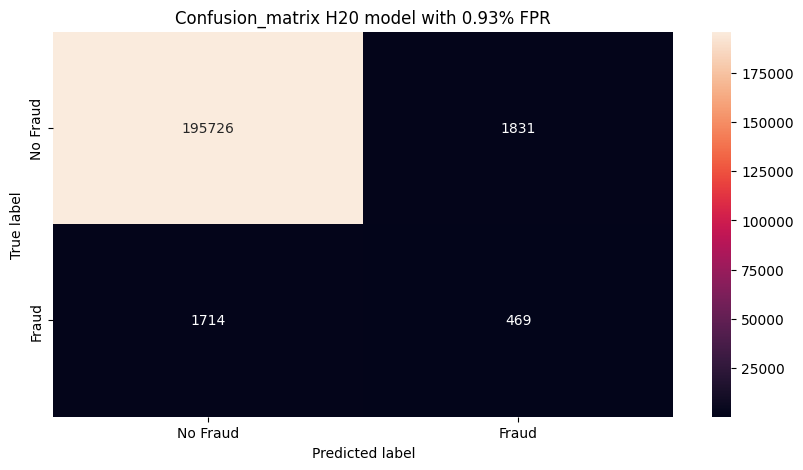

In [ ]:
 fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

conf_matrix = plot_con_matrix(ax1,true_labels, predicted_labels, 'Confusion_matrix H20 model')
plt.show()